# Importing Libraries

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Problem Statement

Given a dataset which captures the salary from July 1st, 2013 through June 30th, 2014. It includes only those employees who are employed on June 30, 2014. Predict the salary of Employees working in Baltimore.

# Importing the dataset

Link: https://raw.githubusercontent.com/Lochana24/Baltimore-Salary-Prediction/main/train.csv

or Download from :- https://drive.google.com/file/d/1o2oqgm8iIJSf8N23IvnsfLrTgdD8dJLj/view?usp=sharing


In [73]:
df = pd.read_csv(" https://raw.githubusercontent.com/Lochana24/Baltimore-Salary-Prediction/main/train.csv")

In [74]:
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [75]:
df.tail()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12
18980,"Zukowski,Charles J",Waste Water Tech Supv I Pump,A50206,DPW-Water & Waste Water,10/15/1979,$53568.00,$52164.32


In [76]:
df.shape

(18981, 7)

In [77]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [78]:
df.rename(columns={' Name':'Name'},inplace=True) # to remove space in front of name or you can use newdf.columns= newdf.columns.str.strip().str.lower() i.e
# strip method strings

In [79]:
df.Name.count()

18981

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [81]:
# checking the null values
df.isnull().sum()

,0
Name,0
JobTitle,0
AgencyID,0
Agency,0
HireDate,70
AnnualSalary,0
GrossPay,3223


In [82]:
df.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981,18981,18981,18981,18911,18981,15758
unique,18788,1075,1177,65,4737,1590,13732
top,"Battle,Daron J",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00,$1051.25
freq,2,4817,316,4323,1478,4811,848


In [83]:
# df.Name.nunique()value_counts , groupby

In [84]:
df.Name = df.Name.str.lower()

In [85]:
df.Name

,Name
0,"aaron,keontae e"
1,"aaron,patricia g"
2,"aaron,petra l"
3,"abaineh,yohannes t"
4,"abbene,anthony m"
...,...
18976,"zotamou,jean marie d"
18977,"zotamou,pivot d"
18978,"zovistoski,zachary d"
18979,"zubyk,stanislav t"


In [86]:
df.columns = df.columns.str.lower()

In [87]:
df.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary',
       'grosspay'],
      dtype='object')

In [88]:
df.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary,grosspay
0,"aaron,keontae e",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"aaron,patricia g",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"aaron,petra l",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"abaineh,yohannes t",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"abbene,anthony m",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [89]:
# Deleting the column grosspay
df.drop('grosspay', axis=1 , inplace=True)

In [90]:
df.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary
0,"aaron,keontae e",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00
1,"aaron,patricia g",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00
2,"aaron,petra l",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00
3,"abaineh,yohannes t",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00
4,"abbene,anthony m",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00


In [91]:
df.agencyid

,agencyid
0,W02200
1,A03031
2,A29005
3,A65026
4,A99416
...,...
18976,W02235
18977,W02629
18978,A99416
18979,A99262


In [92]:
# Values_counts for agencyid
df.agencyid.value_counts()

,count
agencyid,
P04001,316
C90786,276
W02629,193
P04002,191
A99416,166
...,...
W02539,1
A65052,1
W02106,1


In [93]:
df['agency'][(df.agencyid=='P04001')]

,agency
23,R&P-Recreation (part-ti
34,R&P-Recreation (part-ti
86,R&P-Recreation (part-ti
130,R&P-Recreation (part-ti
151,R&P-Recreation (part-ti
...,...
18764,R&P-Recreation (part-ti
18814,R&P-Recreation (part-ti
18938,R&P-Recreation (part-ti
18943,R&P-Recreation (part-ti


In [94]:
df[['agency','agencyid']].value_counts()

agency                   agencyid
R&P-Recreation (part-ti  P04001      316
TRANS-Crossing Guards    C90786      276
Youth Summer             W02629      193
R&P-Recreation (part-ti  P04002      191
Police Department        A99416      166
                                    ... 
Youth Summer             W02502        1
Youth Summer             W02676        1
                         W02678        1
                         W02679        1
R&P-Parks (wkly)         B68080        1
Name: count, Length: 1177, dtype: int64

In [95]:
df[['agency','agencyid']].groupby(['agencyid']).value_counts().sort_values(ascending=False)

,,count
agencyid,agency,
P04001,R&P-Recreation (part-ti,316
C90786,TRANS-Crossing Guards,276
W02629,Youth Summer,193
P04002,R&P-Recreation (part-ti,191
A99416,Police Department,166
...,...,...
W02106,Youth Summer,1
W02107,Youth Summer,1
W02108,Youth Summer,1


In [96]:
df[df.agencyid == 'P04001']['agency'].unique()

array(['R&P-Recreation (part-ti'], dtype=object)

In [97]:
# df.agencyid.value_counts().map(df.agency)

In [98]:
df[df.agencyid == 'W02106']['agency']

,agency
8559,Youth Summer


In [99]:
df.jobtitle.value_counts()

,count
jobtitle,
AIDE BLUE CHIP,4817
POLICE OFFICER,1866
LABORER (Hourly),597
EMT Firefighter Suppression,358
CROSSING GUARD,337
...,...
VEHICLE DAMAGE INVESTIGATOR,1
Community Health Nurse I,1
ACCOUNTING SYSTEMS ANALYST,1


In [100]:
df.annualsalary.value_counts()

,count
annualsalary,
$11310.00,4811
$20800.00,325
$29245.00,196
$43999.00,169
$44773.00,163
...,...
$116300.00,1
$83500.00,1
$40994.00,1


In [101]:
re.sub('\$','',df.annualsalary[0])

'11310.00'

In [102]:
# Remove the $ from the annualsalary column and change the dtype to integer
df.annualsalary = [re.sub('\$','',i) for i in df.annualsalary]
# df['annualsalary'] = df['annualsalary'].str.strip('$').astype(float)

In [103]:
df.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary
0,"aaron,keontae e",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.00
1,"aaron,patricia g",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.00
2,"aaron,petra l",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.00
3,"abaineh,yohannes t",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.00
4,"abbene,anthony m",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.00


In [104]:
df['annualsalary'] = df['annualsalary'].astype(float).astype(int)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18981 non-null  object
 1   jobtitle      18981 non-null  object
 2   agencyid      18981 non-null  object
 3   agency        18981 non-null  object
 4   hiredate      18911 non-null  object
 5   annualsalary  18981 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 889.9+ KB


In [106]:
df.annualsalary.dtype

dtype('int64')

In [107]:
print(re.search('\d{2}',str(df.hiredate[0])).group(0))

06


In [108]:
# hiredate - hireday, hiremonth, hireyear (int)
hiremonth = df.hiredate.str.split('/').str[0]
hireday = df.hiredate.str.split('/').str[1]
hireyear = df.hiredate.str.split('/').str[2]

In [109]:
# x = re.split("\/", str(df.hireday[0]))
# print(x[0])

In [110]:
df.insert(4,'hireday',hireday)
df.insert(loc=5,column='hiremonth',value=hiremonth)
df.insert(6,'hireyear',hireyear)

In [111]:
df.hireday = df.hireday.astype(float)
df.hiremonth = df.hiremonth.astype(float)
df.hireyear = df.hireyear.astype(float)

In [112]:
df.drop(columns='hiredate',inplace=True)

In [113]:
df.head()

,name,jobtitle,agencyid,agency,hireday,hiremonth,hireyear,annualsalary
0,"aaron,keontae e",AIDE BLUE CHIP,W02200,Youth Summer,10.0,6.0,2013.0,11310
1,"aaron,patricia g",Facilities/Office Services II,A03031,OED-Employment Dev,24.0,10.0,1979.0,53428
2,"aaron,petra l",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,25.0,9.0,2006.0,68300
3,"abaineh,yohannes t",EPIDEMIOLOGIST,A65026,HLTH-Health Department,23.0,7.0,2009.0,62000
4,"abbene,anthony m",POLICE OFFICER TRAINEE,A99416,Police Department,24.0,7.0,2013.0,43999


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          18981 non-null  object 
 1   jobtitle      18981 non-null  object 
 2   agencyid      18981 non-null  object 
 3   agency        18981 non-null  object 
 4   hireday       18911 non-null  float64
 5   hiremonth     18911 non-null  float64
 6   hireyear      18911 non-null  float64
 7   annualsalary  18981 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 1.2+ MB


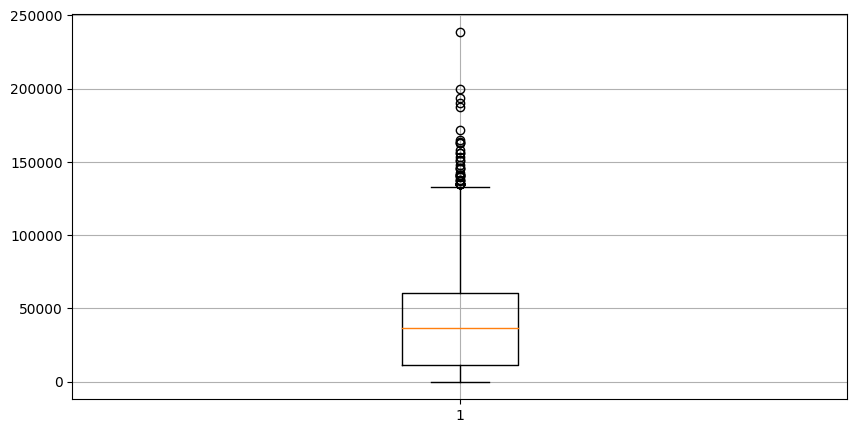

In [115]:
# Plot a BoxPlot for the annualsalary column
plt.figure(figsize=(10,5))
plt.boxplot(df.annualsalary)
plt.grid()
plt.show()

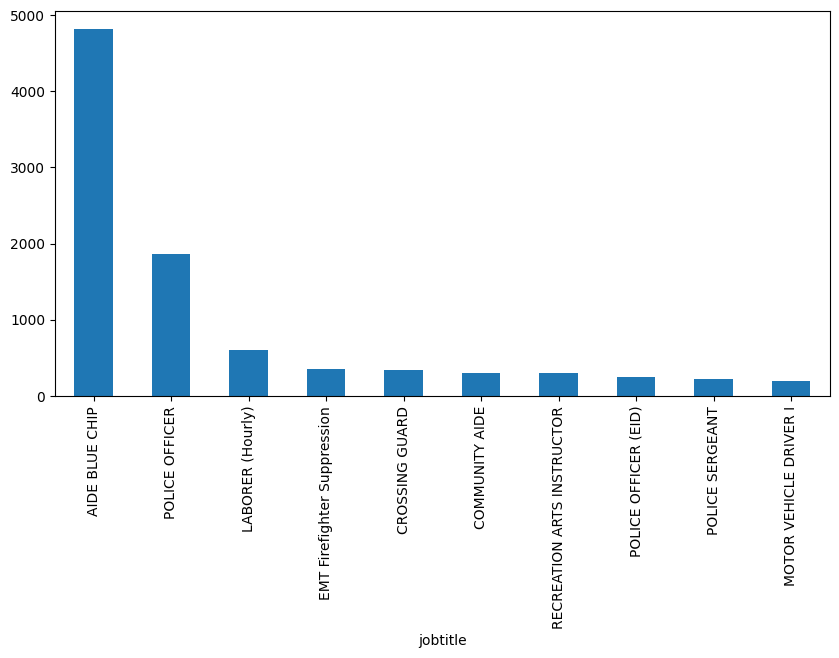

In [116]:
# Plot top 10 Jobs based on hiring
df['jobtitle'].value_counts().head(10).plot(kind='bar',figsize=(10,5))
plt.show()
# df.groupby(['jobtitle'])['name'].count().sort_values(ascending=False).head(10).plot.bar()

In [117]:
df[['jobtitle','annualsalary']].sort_values(by='annualsalary',ascending=False).head(10)

,jobtitle,annualsalary
1229,STATE'S ATTORNEY,238772
3177,EXECUTIVE LEVEL III,200000
991,EXECUTIVE LEVEL III,193800
1350,EXECUTIVE LEVEL III,190000
16355,CONTRACT SERV SPEC II,187200
13053,EXECUTIVE LEVEL III,172000
5698,EXECUTIVE LEVEL III,165000
13841,MAYOR,163365
12595,CITY SOLICITOR,163200
3277,DIRECTOR PUBLIC WORKS,163200


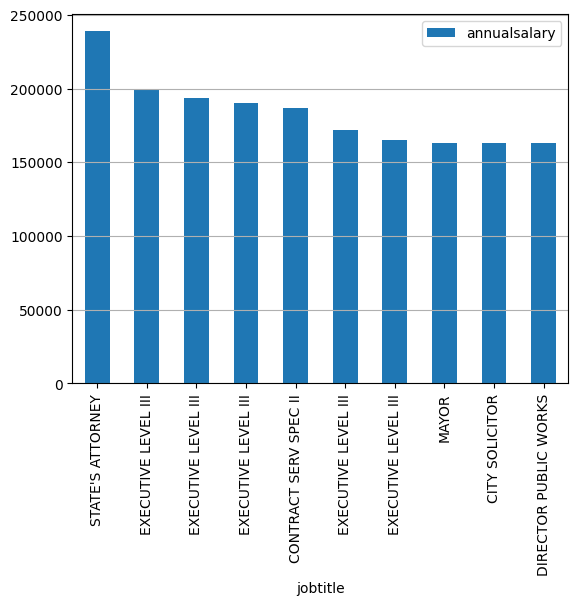

In [118]:
# Plot top 10 jobs with the highest salary
df[['jobtitle','annualsalary']].set_index('jobtitle').sort_values(by='annualsalary',ascending=False).head(10).plot(kind='bar')
plt.grid(axis='y')
plt.show()

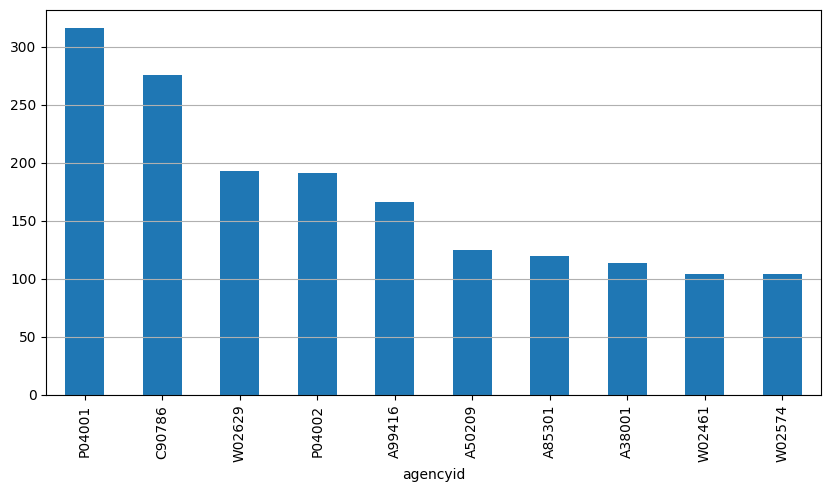

In [119]:
# Plot top 10 Agency's ID that has highest number of Employees
df.agencyid.value_counts().head(10).plot(kind='bar',figsize=(10,5))
plt.grid(axis='y')
plt.show()

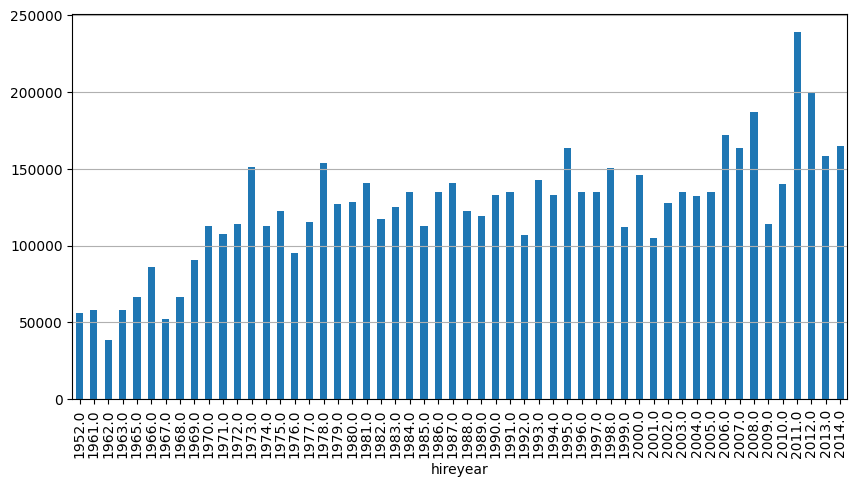

In [120]:
# Plot Highest Salary V/s Year graph
df.groupby('hireyear')['annualsalary'].max().plot(kind='bar',figsize=(10,5))
plt.grid(axis='y')
plt.show()

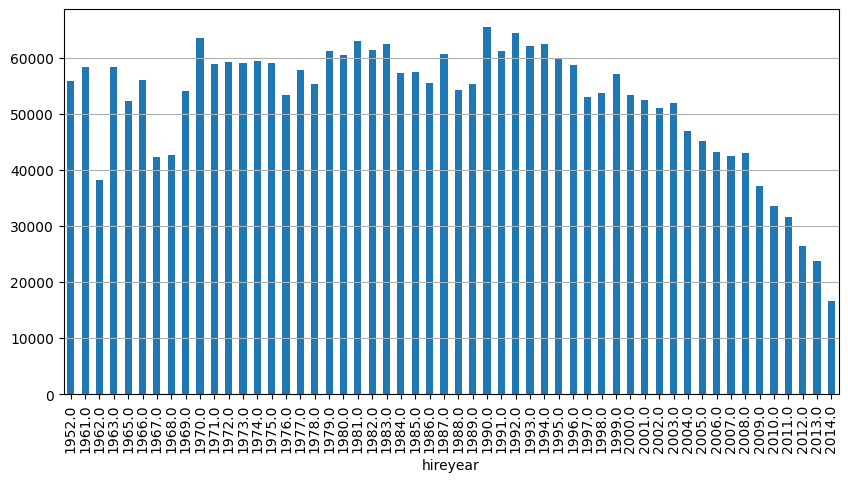

In [121]:
# Plot Average Salary V/s Year graph
df.groupby('hireyear')['annualsalary'].mean().plot(kind='bar',figsize=(10,5))
plt.grid(axis='y')
plt.show()

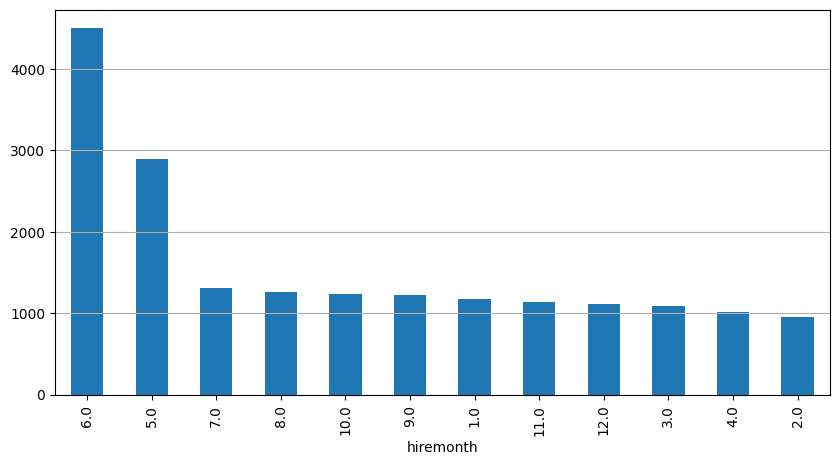

In [122]:
# Plot a graph to check on which month most of the people are hired
df.hiremonth.value_counts().plot(kind='bar',figsize=(10,5))
plt.grid(axis='y')
plt.show()

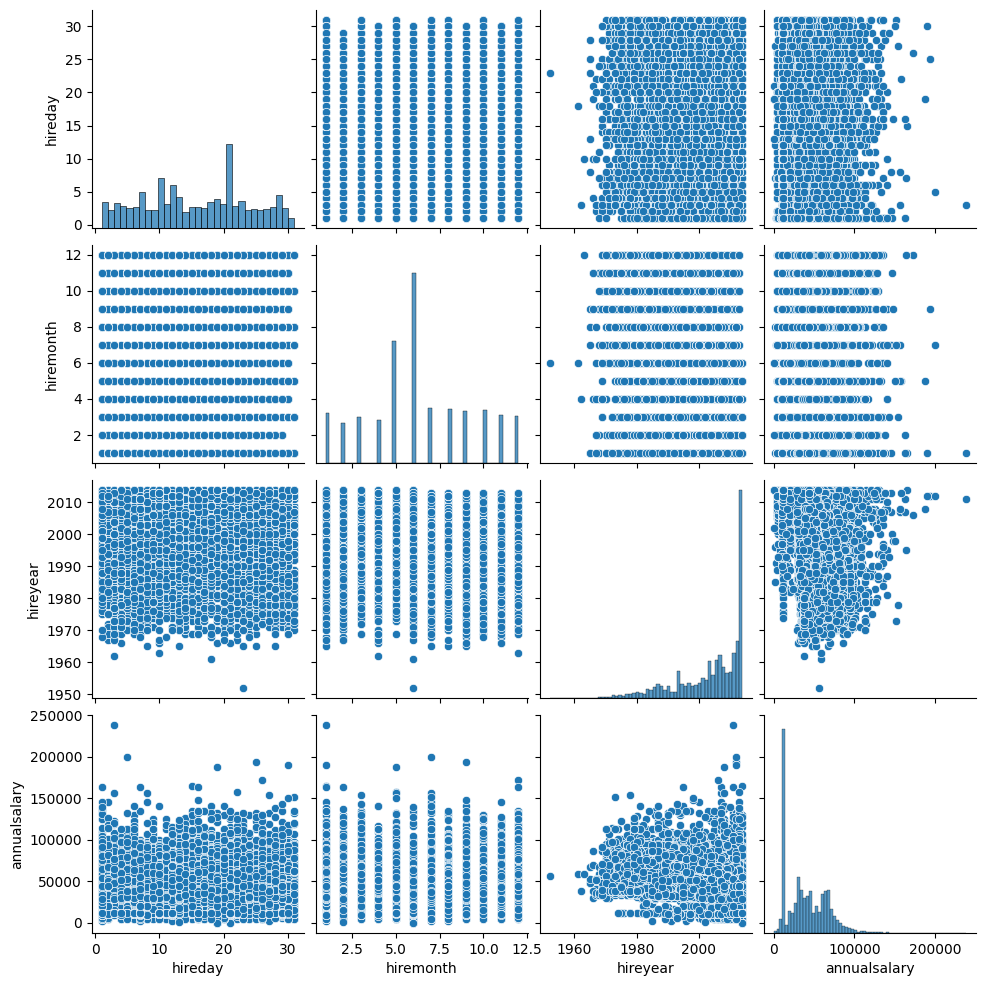

In [123]:
# Plot a pairplot
sns.pairplot(df)
plt.show()

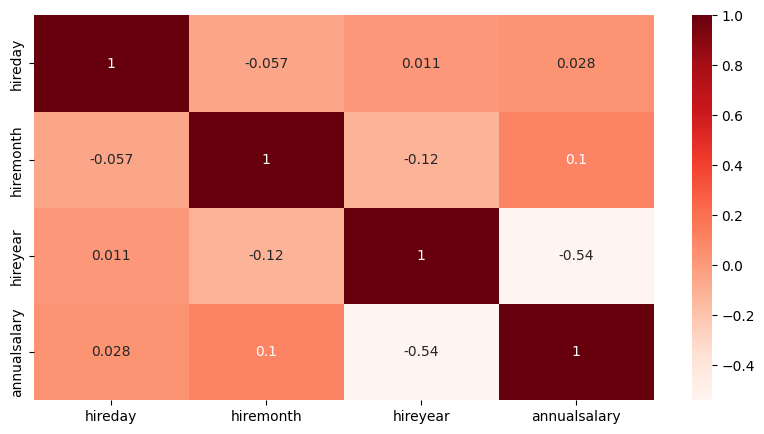

In [129]:
num_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,5))
sns.heatmap(num_df.corr(),annot=True,cmap='Reds')
plt.show()

# Machine Learning

In [130]:
df.head()

,name,jobtitle,agencyid,agency,hireday,hiremonth,hireyear,annualsalary
0,"aaron,keontae e",AIDE BLUE CHIP,W02200,Youth Summer,10.0,6.0,2013.0,11310
1,"aaron,patricia g",Facilities/Office Services II,A03031,OED-Employment Dev,24.0,10.0,1979.0,53428
2,"aaron,petra l",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,25.0,9.0,2006.0,68300
3,"abaineh,yohannes t",EPIDEMIOLOGIST,A65026,HLTH-Health Department,23.0,7.0,2009.0,62000
4,"abbene,anthony m",POLICE OFFICER TRAINEE,A99416,Police Department,24.0,7.0,2013.0,43999


In [131]:
model_df = df.copy()

In [132]:
model_df.drop(columns=['name','jobtitle','agencyid','agency'],inplace=True)

In [133]:
model_df.head()

,hireday,hiremonth,hireyear,annualsalary
0,10.0,6.0,2013.0,11310
1,24.0,10.0,1979.0,53428
2,25.0,9.0,2006.0,68300
3,23.0,7.0,2009.0,62000
4,24.0,7.0,2013.0,43999


replaciing nan values with the mean

In [160]:
model_df[['hireday','hiremonth','hireyear']].isna().sum()

,0
hireday,70
hiremonth,70
hireyear,70


In [161]:
model_df.hireday.fillna(df.hireday.mean(),inplace=True)
model_df.hiremonth.fillna(df.hiremonth.mean(),inplace=True)
model_df.hireyear.fillna(df.hireyear.mean(),inplace=True)

In [162]:
model_df[['hireday','hiremonth','hireyear']].isna().sum()

,0
hireday,0
hiremonth,0
hireyear,0


In [163]:
x = model_df.iloc[:,:-1].values.reshape(-1,3)
y = model_df.iloc[:,-1].values.reshape(-1,1)

* Data Preprocessing - feature Scalling

In [164]:
stanscale = StandardScaler()

In [165]:
x = stanscale.fit_transform(x)
y = stanscale.fit_transform(y)

* Train Test Split

In [166]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)

In [167]:
x_train.shape

(16133, 3)

In [174]:
y_train.shape

(16133, 1)

In [168]:
len(x_train)

16133

In [169]:
len(y_train)

16133

* choose Model

In [170]:
model = SVR(kernel='rbf')

* Train the Model

In [171]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

* Test the model

In [175]:
y_pred = model.predict(x_test)

In [176]:
y_pred

array([ 0.6717508 ,  0.77307549,  1.0537696 , ..., -0.02608579,
        0.69404326,  0.47478596])

In [177]:
y_pred = stanscale.inverse_transform(y_pred.reshape(-1,1))

In [178]:
y_pred

array([[56666.36351937],
       [59216.9479732 ],
       [66282.68907895],
       ...,
       [39100.14989282],
       [57227.51796281],
       [51708.28820499]])

In [179]:
y_test = stanscale.inverse_transform(y_test)

* Performance Metrics

Text(0.5, 1.0, 'Actual V/s Predicted output')

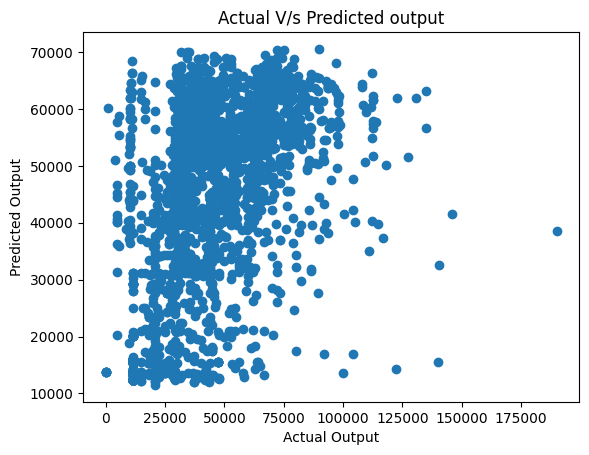

In [181]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual V/s Predicted output')

In [182]:
model.score(x_test,y_test)

-2.4857852787694887

In [183]:
mean_squared_error(y_test,y_pred)

349054438.7005682

In [184]:
r2_score(y_test,y_pred)

0.44059929954516297

In [185]:
mean_absolute_error(y_test,y_pred)

12932.399142768265

* Conclusion

In [ ]:
# If an employee joins on the following date: 02/09/2018, 04,04/2015, 21/12/2021, predict the salaries.

In [189]:
stanscale.inverse_transform(model.predict([[2,9,2018]]).reshape(-1,1))

array([[41837.56525425]])

In [190]:
stanscale.inverse_transform(model.predict([[4,4,2015]]).reshape(-1,1))

array([[41837.56525425]])

In [191]:
stanscale.inverse_transform(model.predict([[21,12,2021]]).reshape(-1,1))

array([[41837.56525425]])